# 🤫 Low Pass Filter?
Don't freak out, there **are multiple names** of Exponentially Weighted Moving Average!
- *Low Pass Filter*
- *Exp. Smoothing*
- *ETS*
- *EWMA*

All are the different way to say the same thing.

### How to do What.

Till now we have seen the ***simple*** average, alright? Which is just the average. Now, let's see the **formulae first** and then see how is what.

# $$ \text{EWMA} = \alpha x_t + (1 - \alpha) \bar x_{t - 1} $$

Where, <br>
$0 \le \alpha \le 1:$ Which is the *weight* that will be applied to Current & Older values.

##### 

#### 🤔 What is going on there?

<img src="../images/EWMA_1st.PNG" height=200 width=300>

- $x_t$ represents the ***actual*** & ***latest*** observation in the time-series
- And the $\alpha$ is applied **directly** to it.
- **Again,** $x_t$ is directly the value itself — no modification — single value.

<img src="../images/EWMA_2st.PNG" height=200 width=300>

- $\bar x_{t - 1}$ represents the ***average*** of ***all*** the previous values before this $t$ point.
- The $\alpha$ is *subtracted* from 1

**So, that means:**
- If the value of **$\alpha$ is 1**
    - Then the $x_t$ will be considered as **is**.
    - The previous values will have **no** meaning (will be multiplied by 0)
    - The EWMA line will be **exactly the same** as the real values (zagged)
- If the value of **$\alpha$ is 0**
    - Then the $x_t$ will be considered as **nothing**.
    - The previous values will be given **higher** weight
    - It means, the **current values has no meaning** and the past values are having meaning
    - The EWMA line will be **smoother**

**So, which value to keep as $\alpha$?** <br>
If the time-series has such values **which's recent values mean the most** *(which is the scenario generally)* the value of $\alpha$ should be `more than 0.5` but `less than 1` otherwise it will have no meaning if kept 1.

> Alpha is the **decay** factor.

##### 

#### 👓 A Quick Look

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

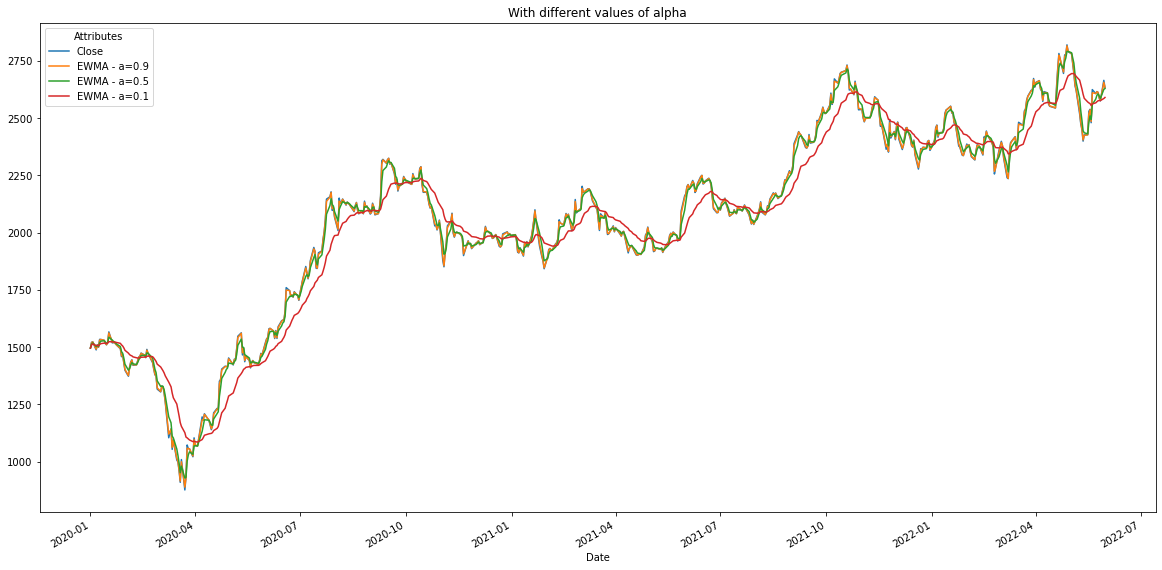

In [33]:
# initializing Parameters
start = "2020-01-01"
end = "2022-05-31"
symbols = ["RELIANCE.NS"]
  
# Getting the data
data = pdr.get_data_yahoo(symbols, start, end)

data = data.droplevel(1, axis=1)
data = data[["Close"]]
  
data["EWMA - a=0.9"] = data['Close'].ewm(alpha=0.9).mean()
data["EWMA - a=0.5"] = data['Close'].ewm(alpha=0.5).mean()
data["EWMA - a=0.1"] = data['Close'].ewm(alpha=0.1).mean()

data.plot(figsize=(20, 10))
plt.title("With different values of alpha");

# 

### 😊 Hold yourself.

Because now we are going to have a *dive* into some interesting maths and will derive at **how the "exponentially" is actually exponential** and where does this: $\alpha x_t + (1 - \alpha) \bar x_{t - 1}$ come from!

So, do you remember the *simple average?*

# $$\bar x = \frac{\sum x}{n}$$

I know the **limit sucks** but I would have to add them in the equation to clarify things. I am sorry because now $\sum$ → $\displaystyle\sum_{n=1}^{n}$ <br> I know... but get used to it man.

So, the updated version of **simple mean**
# $$\bar x = \frac{\displaystyle \sum_{\tau = 1}^{t}x_\tau}{t}$$

Now, ***What if I want to calculate mean in $O(n)$ complexity?***

*(Making a mindless hypothetical problem so that I can answer the above question - and prove that how things are derived 🤭)* <br>
Because see, when there is a **huge data** like in trillions, then as the new data comes like *1,00,000,00**1***st, then we would have to calculate the sum of all data again and then divide by total number. And if *1,00,000,00**2***nd point comes we would have to do the same again.

This becomes terribly slow and inefficient.
___
So, there **should be some way** to calculate the ***new mean*** based on the ***previous calculated mean*** and thus the calculation becomes surprisingly $O(1)$.

### So the formulae is

# $$\bar x_t = \frac{(t - 1)\bar x_{t - 1} + x_t}{t}$$

I mean really! See what's happening there... 
- We are taking the **mean of previous** all days and then adding new point
- Just based on that we can find the new mean

In [1]:
data = [1, 3, 5, 10]

In [3]:
# Previous mean
data[:3]

[1, 3, 5]

In [5]:
previous_mean = sum(data[:3]) / 3
previous_mean

3.0

In [7]:
# New mean
((4 - 1) * previous_mean + data[-1]) / 4

4.75

In [9]:
# From original method it works as well!
sum(data) / 4

4.75

See? Both are same!

### 🧩 The same formula if we re-arrange

# $$\bar x_t = \frac{(t - 1)\bar x_{t - 1} + x_t}{t}$$
#### $$↓$$
# $$\bar x_t = \frac{1}{t}((t - 1)\bar x_{t - 1} + x_t)$$
#### $$↓$$
# $$\bar x_t = \left(1 - \frac{1}{t}\right)\bar x_{t - 1} + \frac{1}{t}x_t$$

Don't worry if you haven't got that. Just know the final outcome is: $\bar x_t = \left(1 - \frac{1}{t}\right)\bar x_{t - 1} + \frac{1}{t}x_t$

### Great stuff.
I know it has been a lot, but let's see what do we have here.

<img src="../images/like_EWMA_2.png" width=400 height=200>

<img src="../images/like_EWMA_1.png" width=400 height=200>

**Hoorraayy** we have found something here. I mean really.

See, how they both have the same form,

- `1st` one is about the arithmetic mean where the value of $\frac{1}{t}$ changes as the data grows
    - The value becomes smaller and smaller as the data grows
- `2nd` one is about our EWMA which has the $\alpha$ in place of the $\frac{1}{t}$
    - And that is **constant**!! 

###### 

## 🤨 How is it then "Exponential"? 
Good question, <br>
See, in the *normal mean* we said the weight ($\frac{1}{t}$) stays the **same** but is looks like it is not, while we said that in *EWMA* the weight ($\alpha$) changes **exponentially** but it isnt't. 

The claim looks ***flipped*** isn't it?

**That is because**: The weights are calculated over time.

###### 

#### 1️⃣ Regular Mean
Here, we are **not** calculating the mean at once right? So, the weight in the previous calculated ***will be counted*** in the current calculation and the same will be true for the future calculation. Thus, if we were *not* to perform $\frac{1}{t}$ then the effect will be redundant **and that will not be same for all points**. 

Thus it might seem like the weight is dereasing for the newer points, but at last all points are getting the same weight. And that $\frac{1}{t}$ will resolve the *double counting* problem.

#### 2️⃣ EWMA
Here we are using the **constant** weight. Since the weight is the constant in all terms, the weight **will be redundant** and will keep increasing or decreasing for the newer points *(based on the weight we are assigning more or less than 0.5)*.

So, the effect might look same at a single point in time, but that is changing exponentially.

**Current Situation:** <br>
$ \text{EWMA} = \alpha x_t + (1 - \alpha) \bar x_{t - 1} $

**Which includes:** <br>
$ \text{EWMA} = \alpha x_t + (1 - \alpha) [\alpha x_{t-1} + (1 - \alpha) \bar x_{t - 2} $

**Which Becomes:** <br>
$ \text{EWMA} = \alpha x_t + (1 - \alpha)\alpha x_{t-1} + (1 - \alpha)^2 \bar x_{t - 2} $

___

**Again:** <br>
$ \text{EWMA} = \alpha x_t + (1 - \alpha)\alpha x_{t-1} + (1 - \alpha)^2 [\alpha x_{t-2} + (1 - \alpha) \bar x_{t - 3}] $

**Which becomes:** <br>
$ \text{EWMA} = \alpha x_t + (1 - \alpha)\alpha x_{t-1} + (1 - \alpha)^2\alpha x_{t-2} + (1 - \alpha)^3 \bar x_{t - 3} $

###### 

You can see brother that: 
## $$(1 - \alpha) → (1 - \alpha)^2 → (1 - \alpha)^3 → \cdots → (1 - \alpha)^{t-1}$$

The **weights affect exponentially**. And the effect of the $1 - \alpha$ becomes less and less as the power increases.

# 

### Let's code

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
passengers = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


We have the monthly data about the airline passengers *(which we have seen before)*.

In [23]:
plt.rcParams["figure.figsize"] = (20, 10)

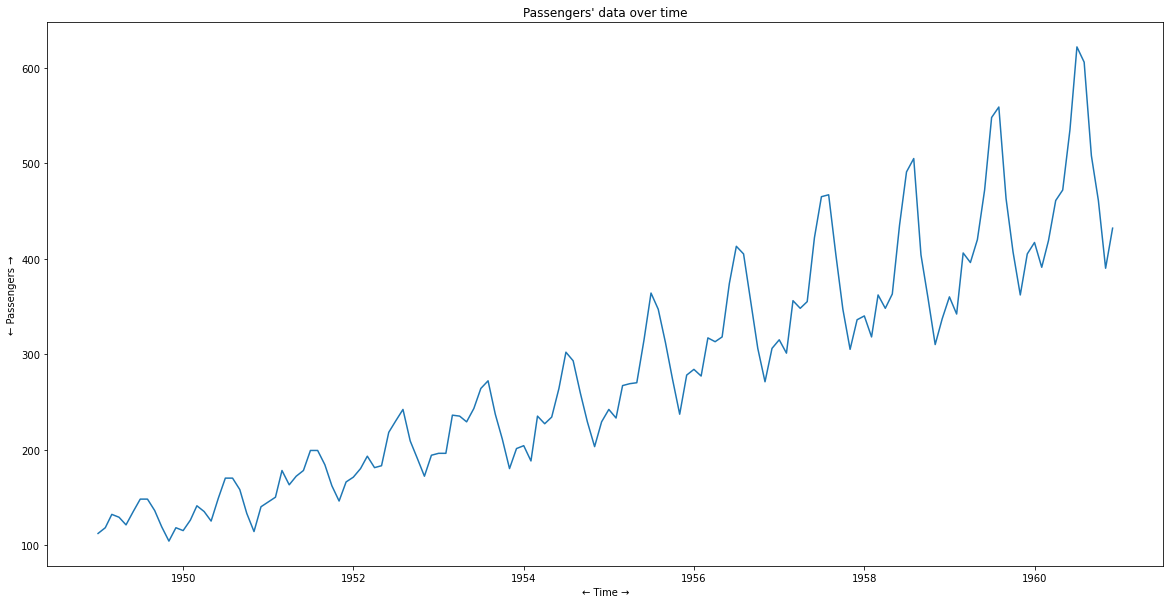

In [25]:
plt.plot(passengers)
plt.title("Passengers' data over time")
plt.xlabel("← Time →")
plt.ylabel("← Passengers →");

**Observations**:
- The data shows **trend** — a positive one
- The data also shows the **seasonal** element
- The passengers per year per season tends to grow (probably exponentially)
- Here the seasonal component **constantly amplifies** overtime — so it is not a constant seasonal element
- There is **very little** randomness in the dataset *(unlike a typical stock data)*


##### 

### EWMA Calculation (by pandas)

In [39]:
# Gives less weight to the new points (smoother curve)
alpha = 0.3

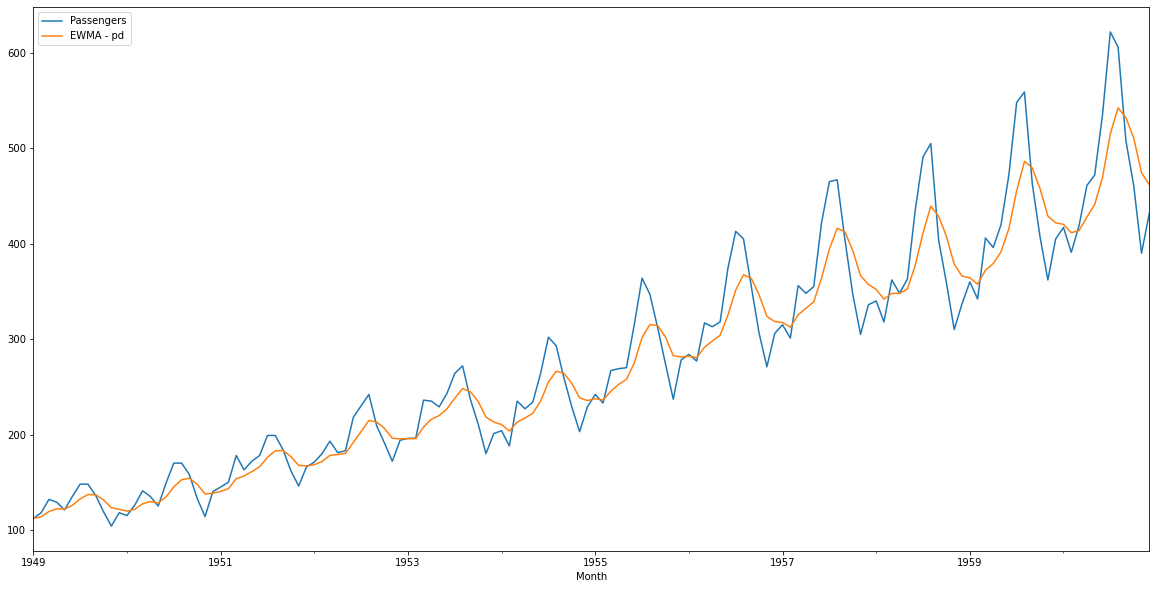

In [40]:
passengers["EWMA - pd"] = passengers["Passengers"].ewm(alpha=alpha, adjust=False).mean()
passengers.plot();

### EWMA Calculation (by Me 😙)

In [39]:
# Gives less weight to the new points (smoother curve)
alpha = 0.3

In [49]:
EWMeans = []
EWMeans.append(passengers["Passengers"].iloc[0]) # very first value

for x_t in passengers["Passengers"].iloc[1:]:
    new_mean = alpha*x_t + (1 - alpha)*EWMeans[-1]
    EWMeans.append(new_mean)

passengers["EWMA - me"] = EWMeans

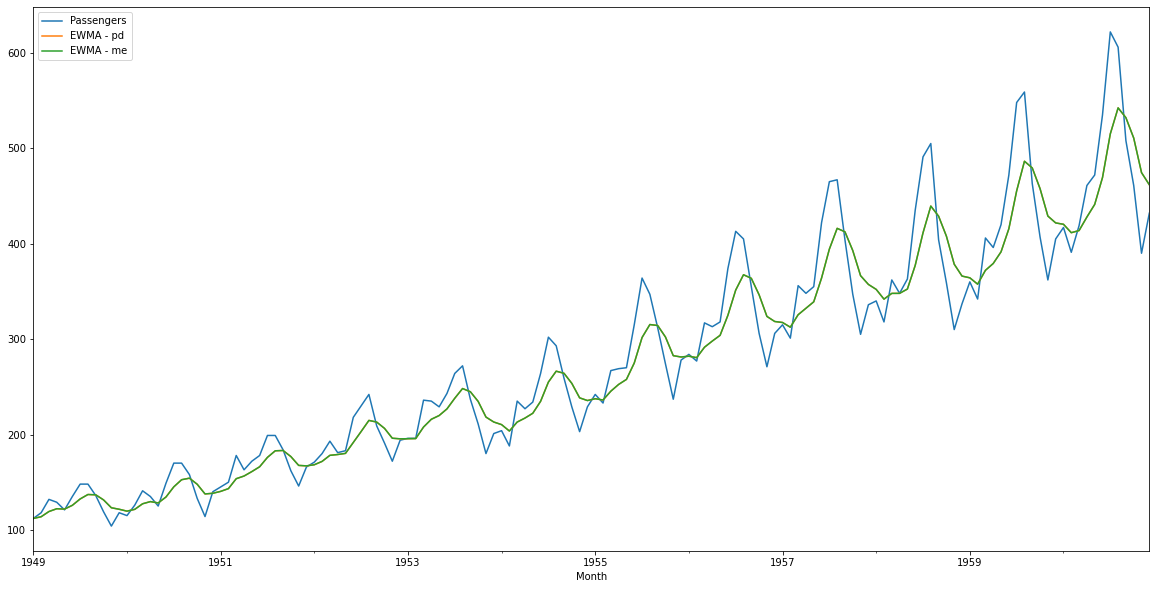

In [50]:
passengers.plot();

Both are exactly the same!

In [51]:
passengers.head()

,Passengers,EWMA - pd,EWMA - me
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.8000,113.8000
1949-03-01,132,119.2600,119.2600
1949-04-01,129,122.1820,122.1820
1949-05-01,121,121.8274,121.8274


# Hush...
A lot was there! But was amazing. Let's get ahead and learn some real forecasting!